# 데이터 불러오기

In [ ]:
import pandas as pd

df = pd.read_csv("data/boston.csv")
df.head()

# 정답 데이터 : MEDV

In [ ]:
df.info()

# 학습 데이터 만들기

In [ ]:
import torch

X_train = df.iloc[:,:13].values
# X_train = torch.tensor(X_train)
X_train = torch.FloatTensor(X_train)

y_train = df['MEDV'].values
y_train = torch.FloatTensor(y_train)

# 모델 만들기

In [ ]:
import torch.nn as nn
from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(), # 활성함수
    nn.Linear(100, 50),
    nn.ReLU(), # 활성함수
    nn.Linear(50, 1),
)
model

In [ ]:
for name, param in model.named_parameters():
    print(f"Name: {name}")
    print(f"Shape: {param.shape}")
    print(f"Values: {param}\n")

In [ ]:
# GPU에 데이터 올리기
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

X_train = X_train.to(device)
y_train = y_train.to(device)
model = model.to(device)


optim = Adam(model.parameters(), lr = 0.001) # 최적화 함수
epoches = 500 # 학습 횟수
criterion = nn.MSELoss() # 손실 함수

error_list = []
for epoch in range(epoches):
    optim.zero_grad() # 최적화 함수를 초기화 해야함 (한 번 학습시 마다)

    y_pred = model(X_train)

    loss = criterion(y_pred, y_train.view(-1,1))
    error_list.append(loss.item())  # 텐서 → float 변환
    loss.backward()
    optim.step()

    print(f"{epoch} : loss : {loss.item()}")


0 : loass : 84.98419189453125
1 : loass : 76.21322631835938
2 : loass : 65.22412109375
3 : loass : 69.59772491455078
4 : loass : 67.921875
5 : loass : 68.64677429199219
6 : loass : 69.10103607177734
7 : loass : 65.45116424560547
8 : loass : 62.77463150024414
9 : loass : 62.46339416503906
10 : loass : 61.398704528808594
11 : loass : 60.42716598510742
12 : loass : 61.19956970214844
13 : loass : 61.57677459716797
14 : loass : 60.37873077392578
15 : loass : 59.29243850708008
16 : loass : 58.75349807739258
17 : loass : 57.67719650268555
18 : loass : 56.6019172668457
19 : loass : 56.482765197753906
20 : loass : 56.62446975708008
21 : loass : 56.28379440307617
22 : loass : 55.996612548828125
23 : loass : 55.953575134277344
24 : loass : 55.52702331542969
25 : loass : 54.895938873291016
26 : loass : 54.645538330078125
27 : loass : 54.41743469238281
28 : loass : 53.98713684082031
29 : loass : 53.732154846191406
30 : loass : 53.512123107910156
31 : loass : 53.04884338378906
32 : loass : 52.654979

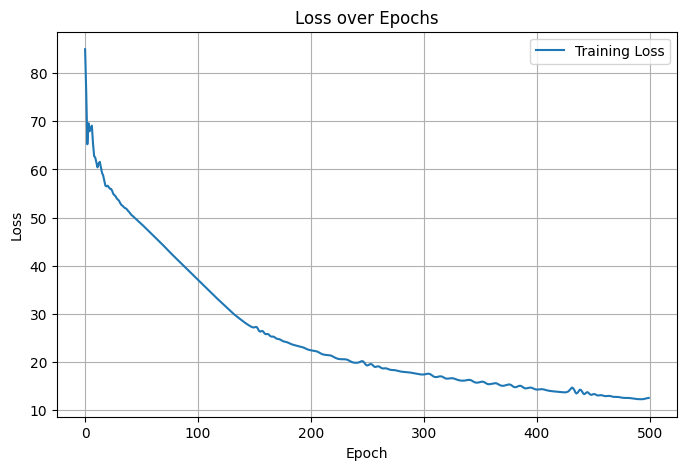

In [21]:
# 그래프 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(error_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.state_dict()